# Crop Yield Prediction Dataset

### by Collins Ikiara, 2024

## About the Dataset

## Introduction
Crop yield prediction plays a vital role in modern agriculture, especially with the increasing adoption of data-driven approaches. Comprehensive datasets, including information about soil composition, environmental factors, historical yield data, and crop management practices, are crucial for accurate yield predictions. Analyzing and understanding these datasets can provide valuable insights for optimizing agricultural practices and ensuring sustainable crop production.

## Importance of studying this dataset 
Accurate crop yield prediction is essential for modern agriculture's success, enabling farmers to make informed decisions, optimize resource use, mitigate risks, and enhance sustainability. Leveraging comprehensive datasets and advanced analytical tools empowers farmers and agricultural experts to improve production efficiency, resilience, and profitability, ultimately ensuring food security and environmental stewardship in the agricultural sector.

## Dataset Columns

1. **Nitrogen** - the ratio of Nitrogen content in the soil (Integer)
2. **Phosphorus** - the ratio of Phosphorus content in the soil (Integer)
3. **Potassium** - the ratio of Potassium content in the soil (Integer)
4. **Temperature** - temperature in degrees Celsius (Float)
5. **Humidity** - relative humidity in % (Float)
6. **pH_Value** - pH value of the soil (Float)
7. **Rainfall** - rainfall in mm (Float)
8. **Crop** - Crop names (String)
9. **Yield** - yield generated (Integer)

## Objective

The objective of this exercise is to build a Machine Learning model that predicts values in the **Yield** column based on the other feature columns.


<hr style="border:1px solid black">

## Step 1: Data Understanding and Exploration

### 1.1 Import necessary libraries

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. Load the Dataset

**Explanation:**
We start by loading the dataset. This step is crucial to bring the data into our working environment for further processing and analysis.

In [56]:
# Load the dataset
df = pd.read_csv('Crop_Yield_Prediction.csv')

# Display the first few rows of the dataset
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


### 1.2. Initial Data Inspection

**Explanation:**
Inspect the dataset to understand its structure, data types, and identify any missing values. This helps in planning the data cleaning process.

In [57]:
# Check the structure of the dataset, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [58]:
# Summarize missing values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [59]:
# Check basic statistics for numerical columns
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


<hr style="border:1px solid black">

## Step 2: Data Preprocessing

### 2.1. Check for Duplicates

**Explanation:**
Check for any duplicate rows and remove them if necessary to ensure data integrity.

In [60]:
# Check for duplicates
df.duplicated().sum()

0

### 2.2. Handle Outliers

**Explanation:**
Detect and handle outliers. Outliers can be identified using statistical methods or visualization techniques (e.g., box plots).

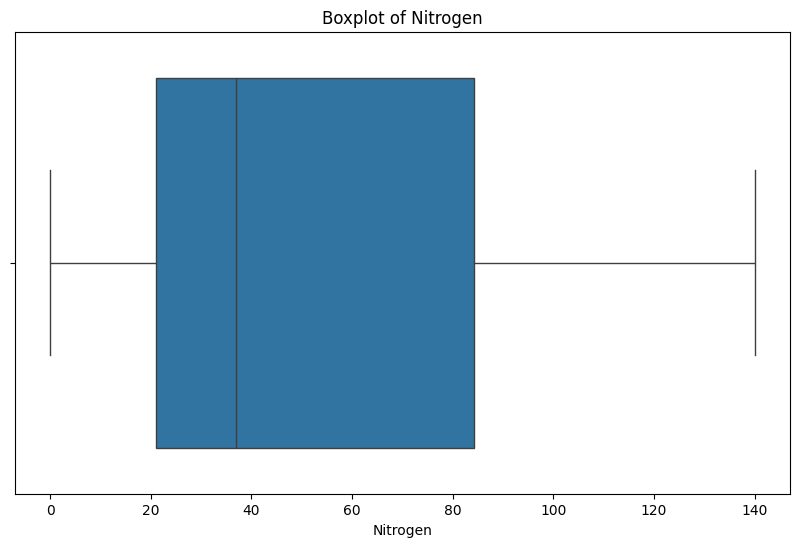

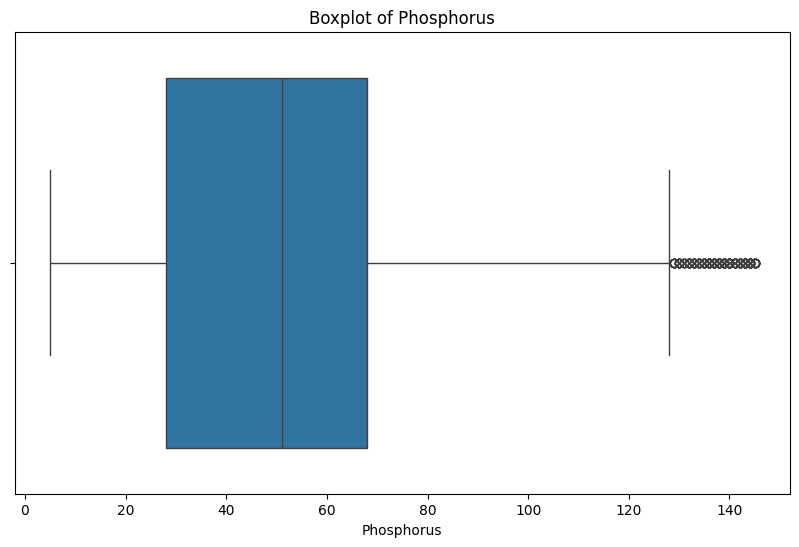

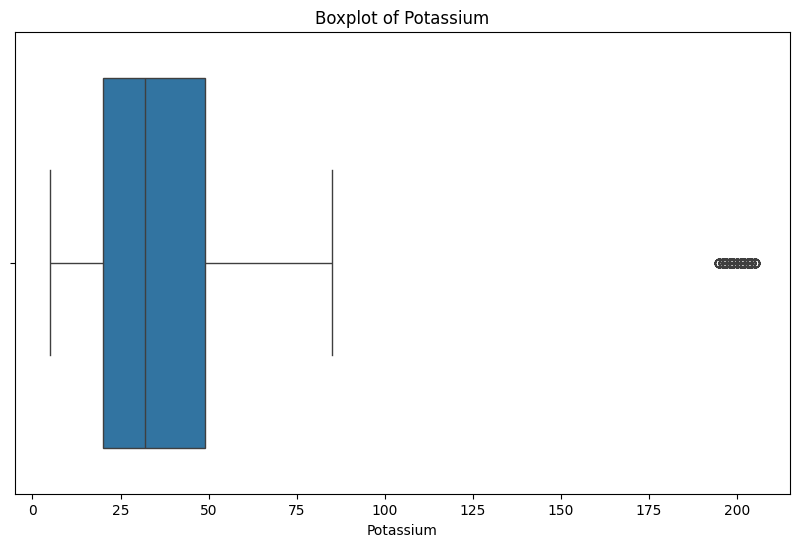

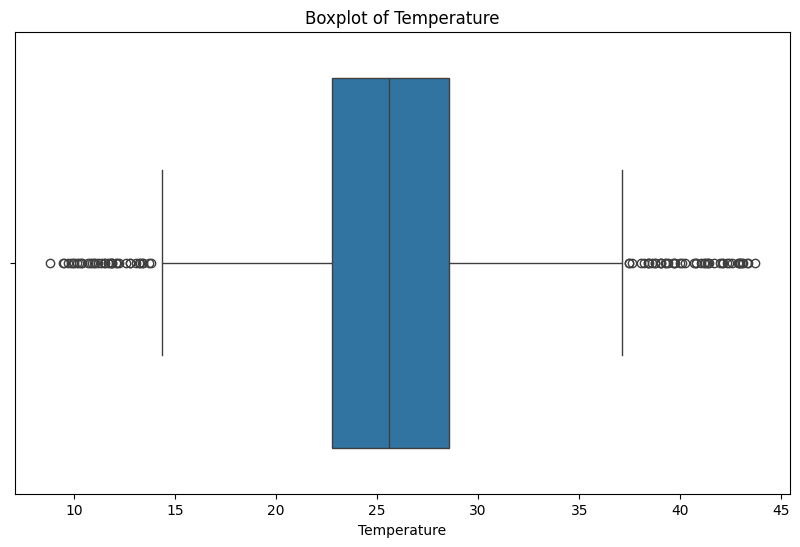

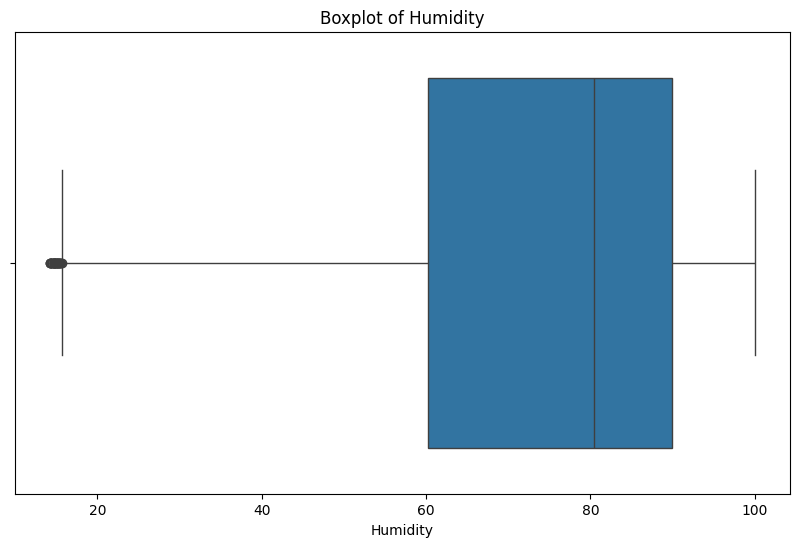

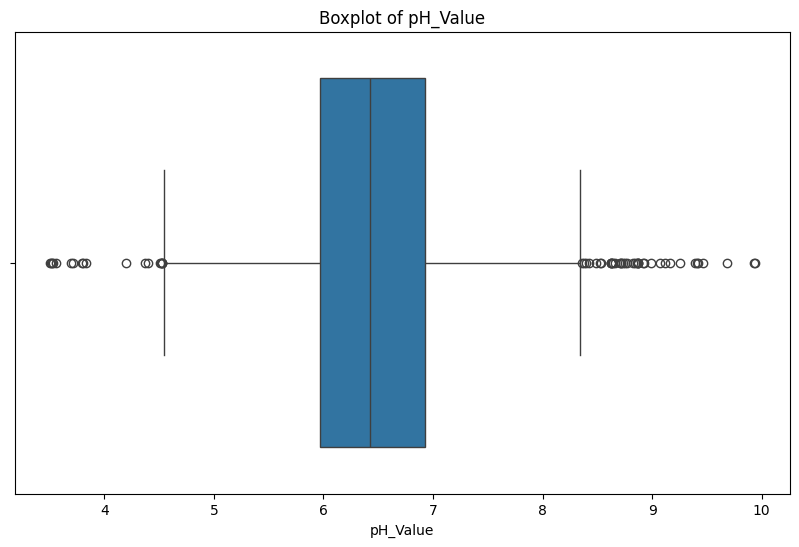

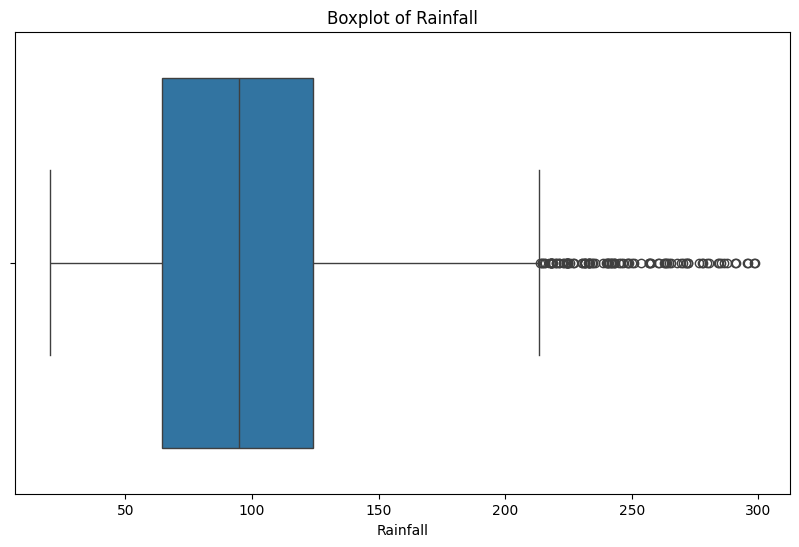

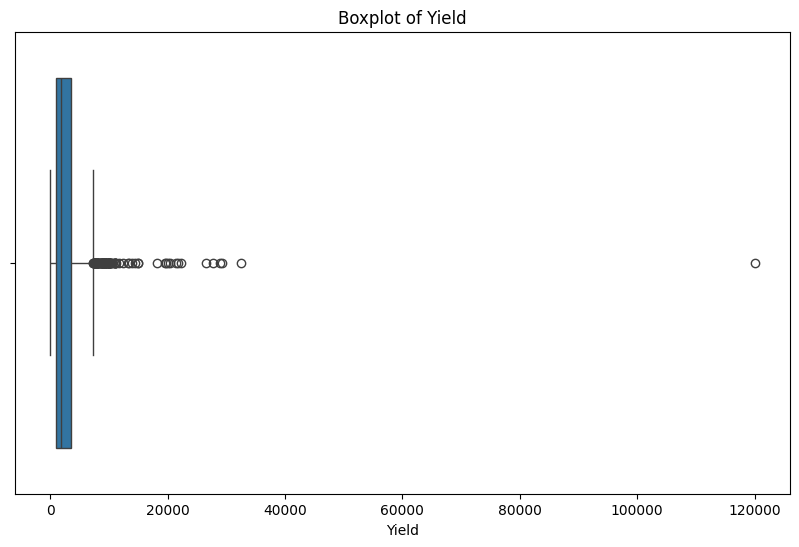

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize outliers using box plots
for column in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'Yield']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [62]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to all relevant columns
for column in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'Yield']:
    df = cap_outliers_iqr(df, column)

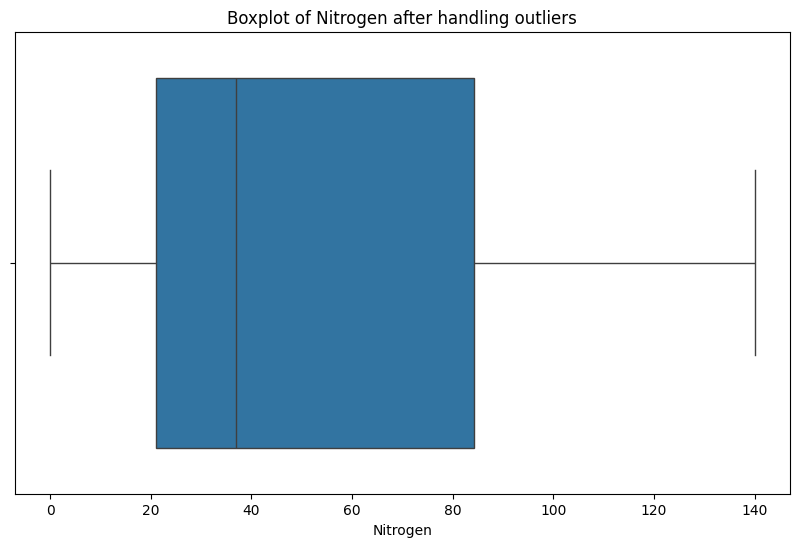

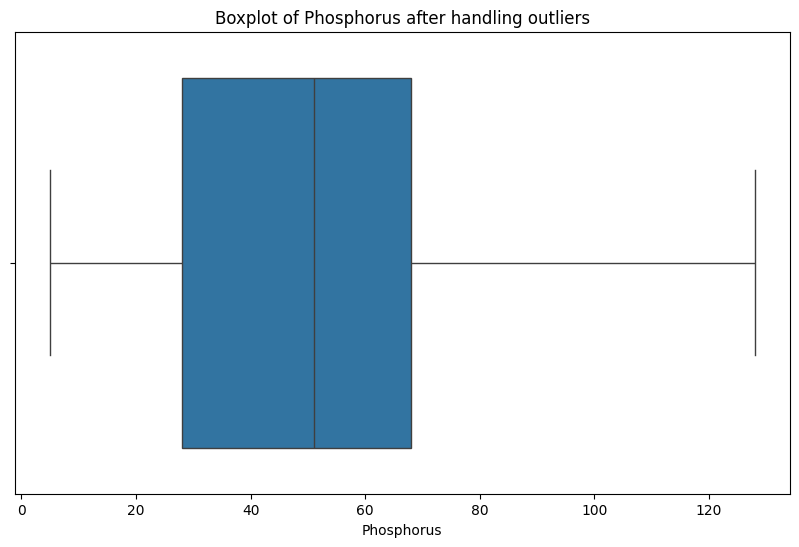

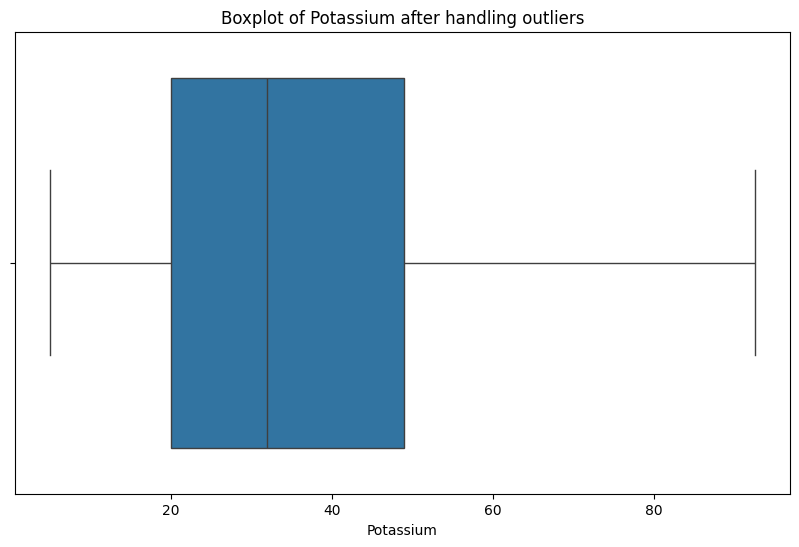

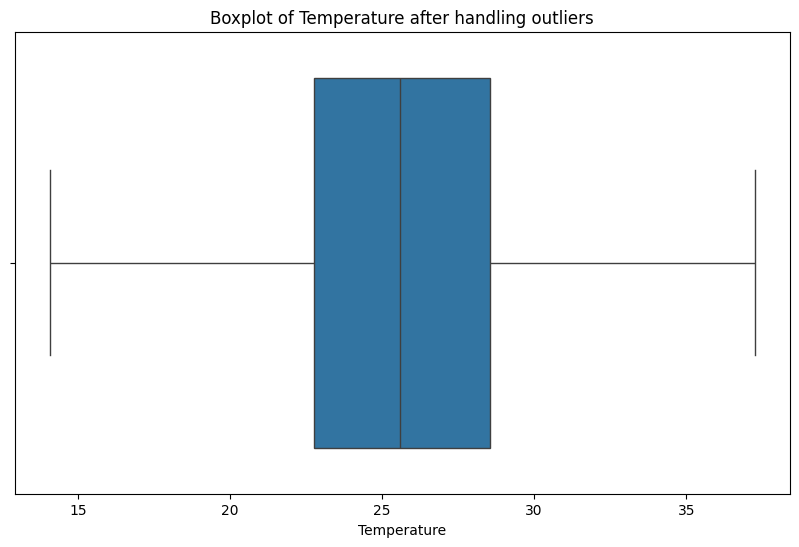

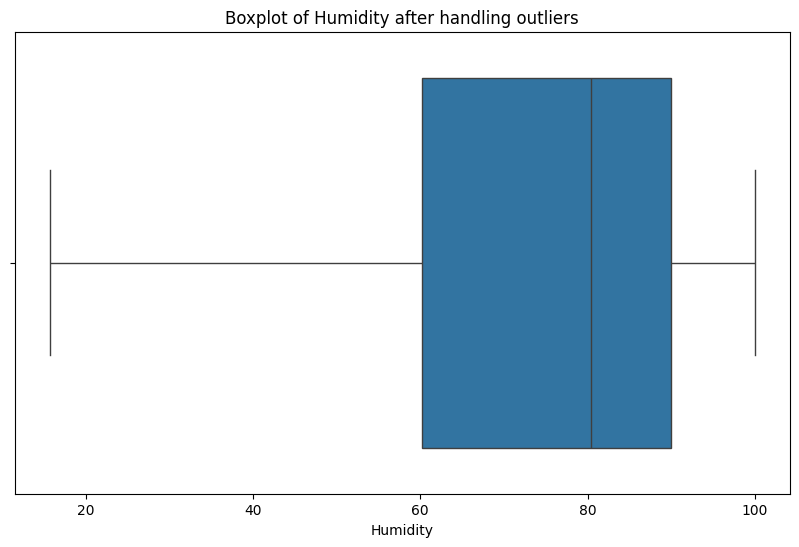

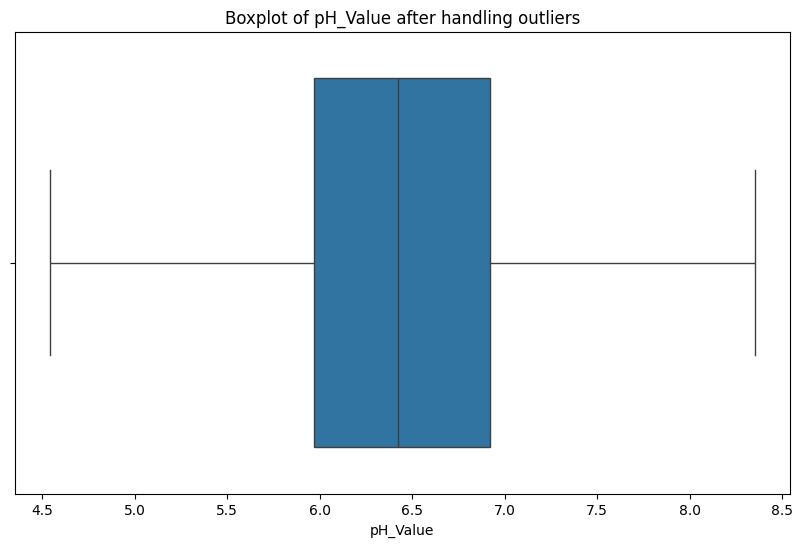

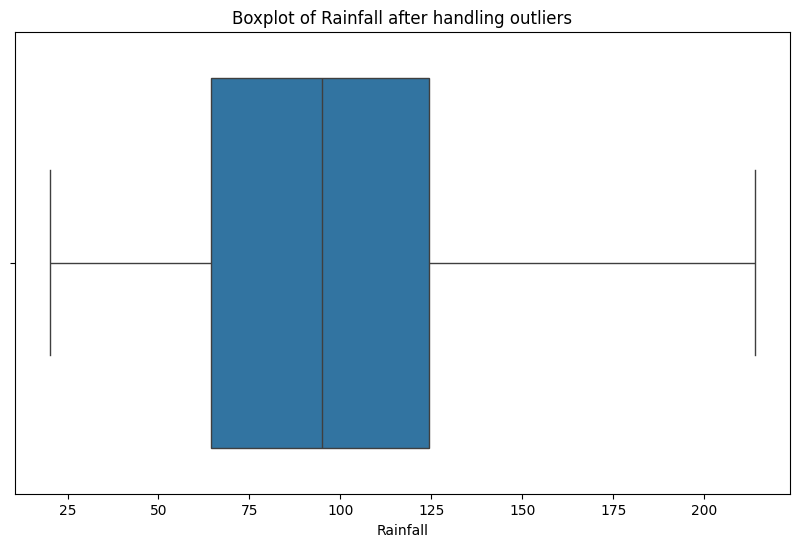

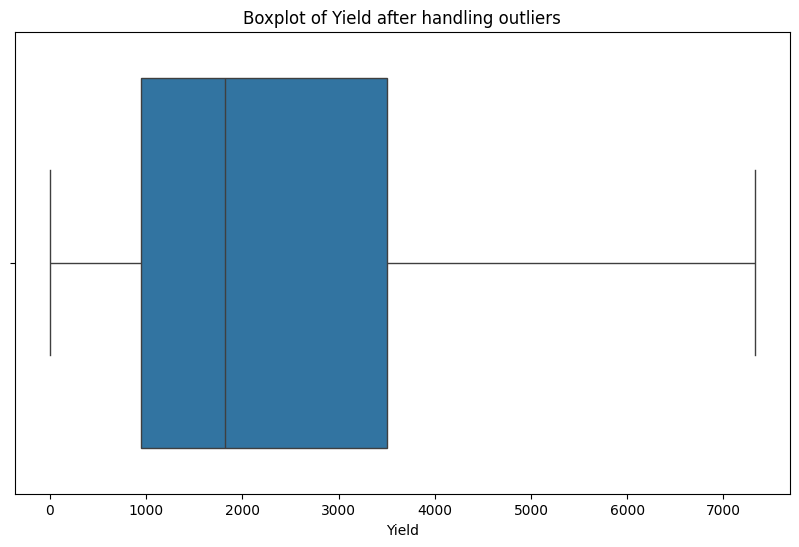

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize boxplots for each relevant column after capping outliers
for column in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'Yield']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} after handling outliers')
    plt.show()

In [64]:
# Verify the dataset after outlier removal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   float64
 1   Phosphorus   2200 non-null   float64
 2   Potassium    2200 non-null   float64
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   float64
dtypes: float64(8), object(1)
memory usage: 154.8+ KB


### 2.3. Correct Data Types

**Explanation:**
Ensure that all columns have the correct data types. Convert columns to appropriate data types if necessary.

In [65]:
# Convert columns to appropriate data types if necessary
# Convert 'Nitrogen', 'Phosphorus', 'Yield', and 'Potassium' columns from string to integer (if they were incorrectly loaded)
df['Nitrogen'] = df['Nitrogen'].astype('int64')
df['Phosphorus'] = df['Phosphorus'].astype('int64')
df['Potassium'] = df['Potassium'].astype('int64')
df['Yield'] = df['Yield'].astype('int64')

# Convert 'Temperature', 'Humidity', 'pH_Value', and 'Rainfall' columns from string to float (if they were incorrectly loaded)
df['Temperature'] = df['Temperature'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df['pH_Value'] = df['pH_Value'].astype(float)
df['Rainfall'] = df['Rainfall'].astype(float)

# Convert 'Crop' column to category
df['Crop'] = df['Crop'].astype('category')

# Verify the data types of the columns after conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Nitrogen     2200 non-null   int64   
 1   Phosphorus   2200 non-null   int64   
 2   Potassium    2200 non-null   int64   
 3   Temperature  2200 non-null   float64 
 4   Humidity     2200 non-null   float64 
 5   pH_Value     2200 non-null   float64 
 6   Rainfall     2200 non-null   float64 
 7   Crop         2200 non-null   category
 8   Yield        2200 non-null   int64   
dtypes: category(1), float64(4), int64(4)
memory usage: 140.5 KB
None


<hr style="border:1px solid black">

## Step 3: Exploratory Data Analysis (EDA)

### 3.1. Data Structure

**Explanation:**
Understand the structure of the dataset after preprocessing and cleaning.

In [66]:
# Display the first few rows of the dataset
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,213.841241,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,213.841241,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,213.841241,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,213.841241,Rice,7325


In [67]:
# Check the dimensions of the dataset (rows, columns)
print(f'Dataset dimensions: {df.shape}')

Dataset dimensions: (2200, 9)


In [68]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Nitrogen     2200 non-null   int64   
 1   Phosphorus   2200 non-null   int64   
 2   Potassium    2200 non-null   int64   
 3   Temperature  2200 non-null   float64 
 4   Humidity     2200 non-null   float64 
 5   pH_Value     2200 non-null   float64 
 6   Rainfall     2200 non-null   float64 
 7   Crop         2200 non-null   category
 8   Yield        2200 non-null   int64   
dtypes: category(1), float64(4), int64(4)
memory usage: 140.5 KB


In [69]:
# Display summary statistics
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,52.743182,38.330909,25.588740,71.493347,6.464205,101.986465,2455.339545
std,36.917334,31.427156,23.355616,4.738804,22.234536,0.730288,51.165743,1939.647349
min,0.000000,5.000000,5.000000,14.080956,15.731726,4.543768,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,128.000000,92.000000,37.250073,99.981876,8.351567,213.841241,7325.000000


In [70]:
# Summary for categorical variables
df['Crop'].value_counts()

Crop
Apple          100
Banana         100
Rice           100
Pomegranate    100
PigeonPeas     100
Papaya         100
Orange         100
Muskmelon      100
MungBean       100
MothBeans      100
Mango          100
Maize          100
Lentil         100
KidneyBeans    100
Jute           100
Grapes         100
Cotton         100
Coffee         100
Coconut        100
ChickPea       100
Blackgram      100
Watermelon     100
Name: count, dtype: int64

In [71]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Missing values in each column:
Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64
Number of duplicate rows: 0


### 3.2. Data Visualization

**Explanation:**
Visualize the distribution of the features and the relationships between them.

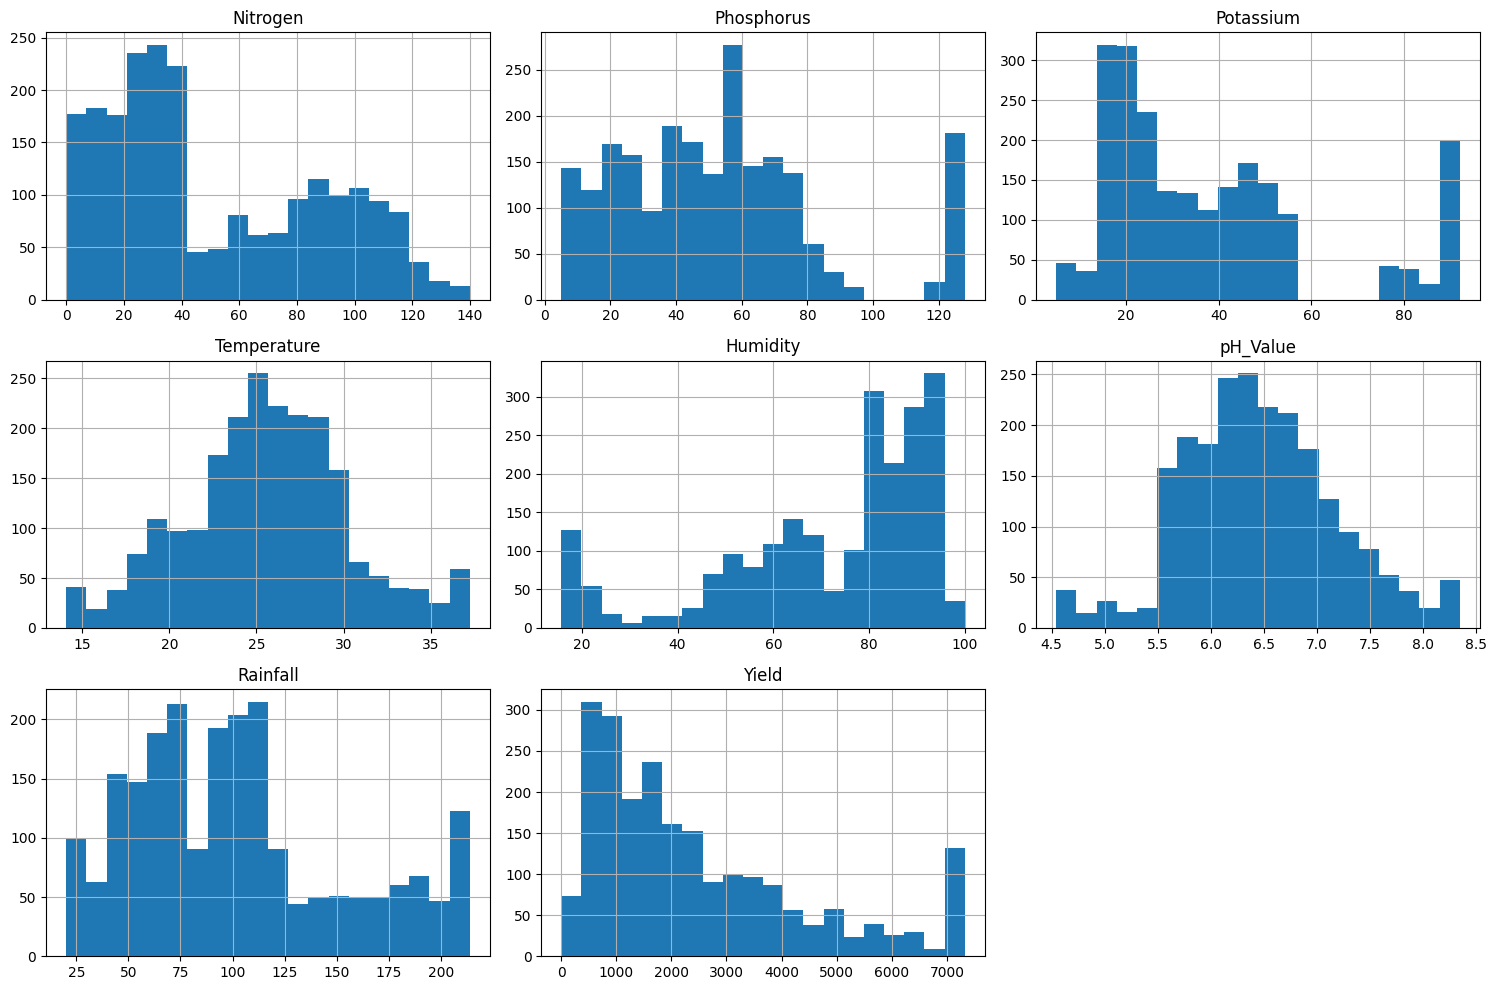

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical variables distribution
num_cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'Yield']
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

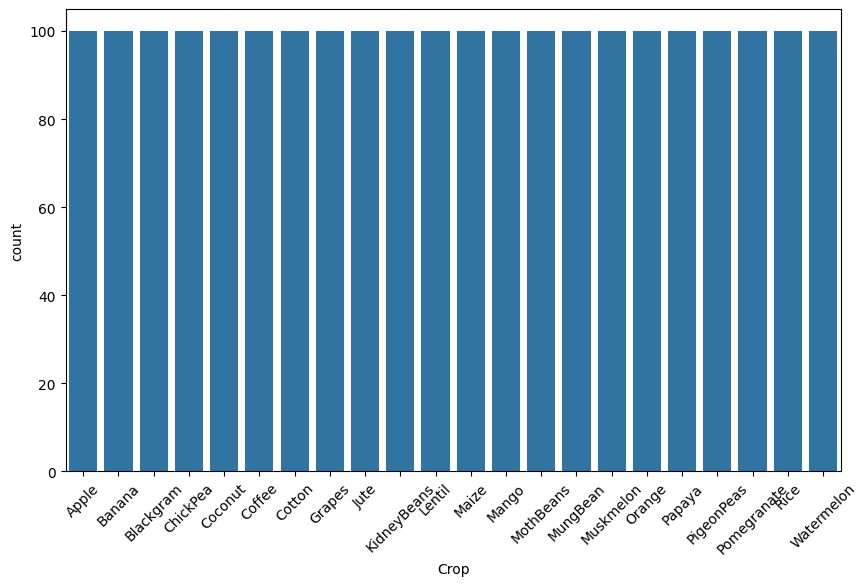

In [73]:
# Categorical variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Crop', data=df)
plt.xticks(rotation=45)
plt.show()

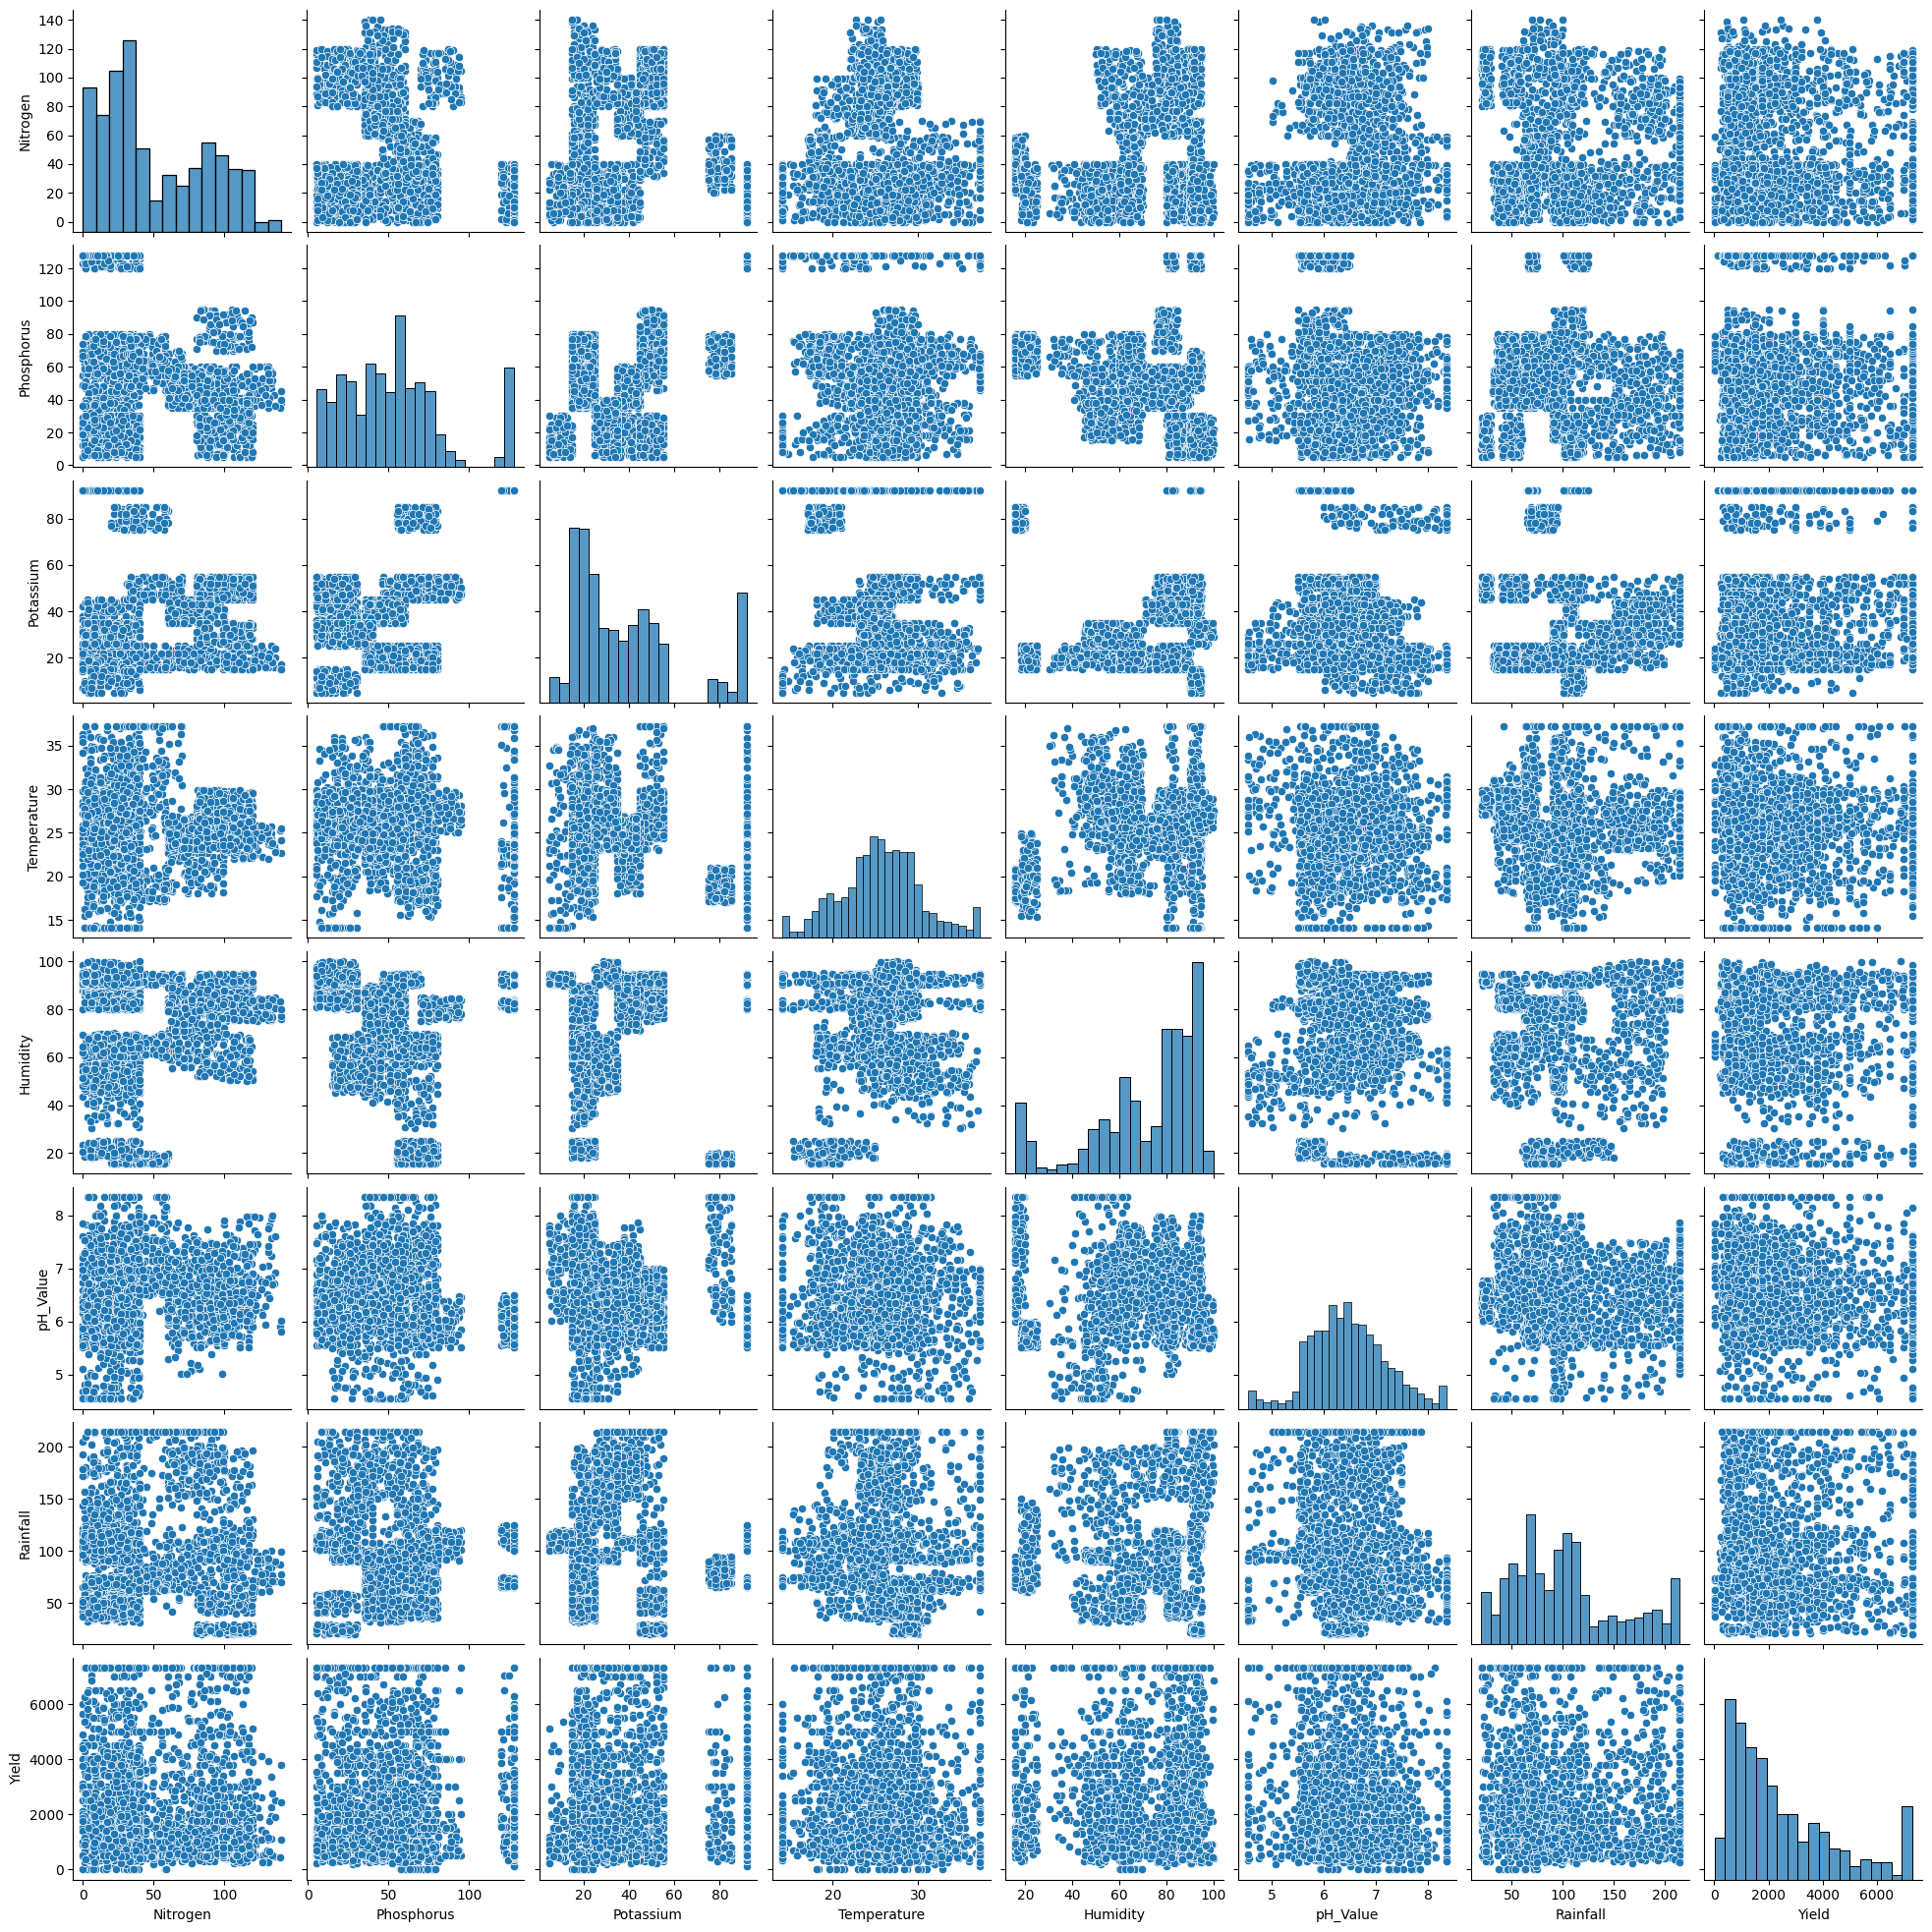

In [74]:
# Pairplot for numerical variables
sns.pairplot(df[num_cols])
plt.show()

### 3.3. Correlation Analysis

**Explanation:**
Analyze the correlation between features to understand their relationships.

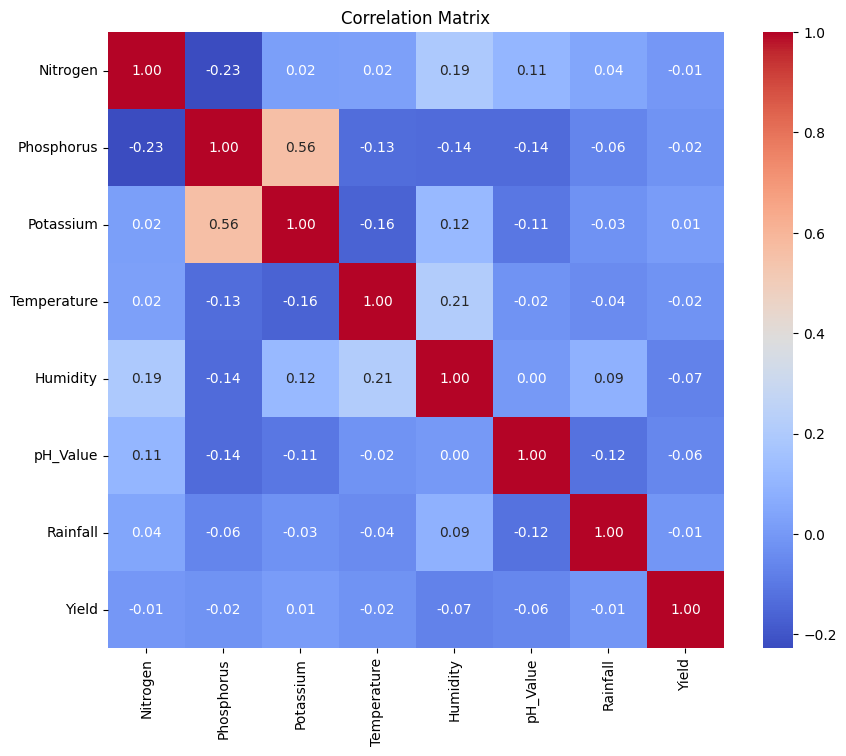

In [75]:
# Correlation matrix
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

### 3.4. Outliers Detection

**Explanation:**
Identify outliers in the dataset.

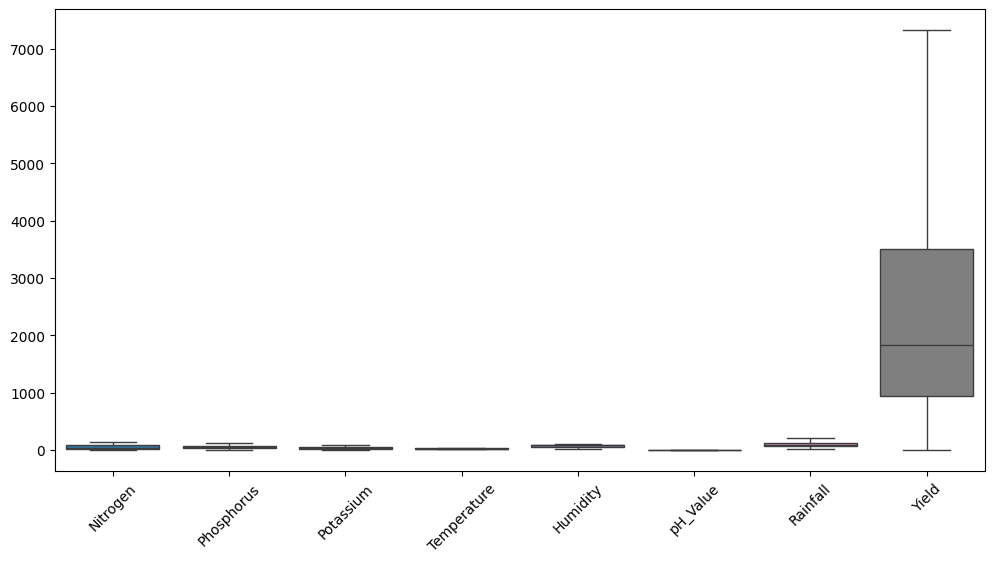

In [76]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()

### 3.5. Explore Target Variable Distribution

**Explanation:**
Explore how 'Yield' is distributed in the dataset.

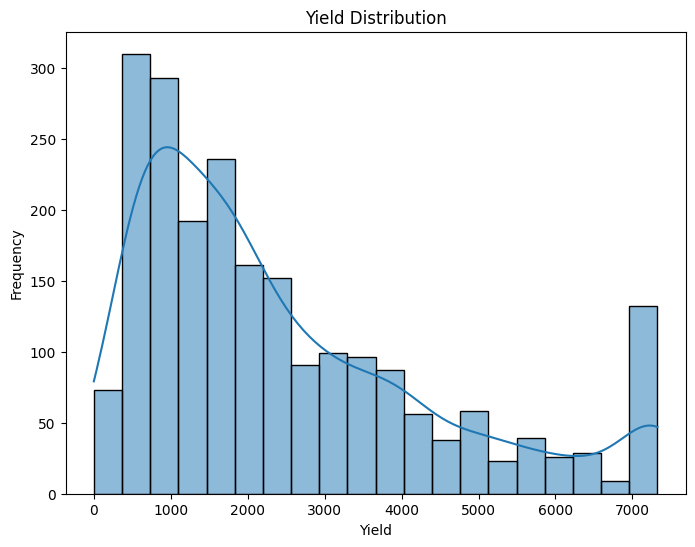

In [77]:
# Target variable 'Yield' distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Yield'], bins=20, kde=True)
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.title('Yield Distribution')
plt.show()

### 3.6. Segmented Analysis

**Explanation:**
Perform a segmented analysis of Yield distribution by crop type.

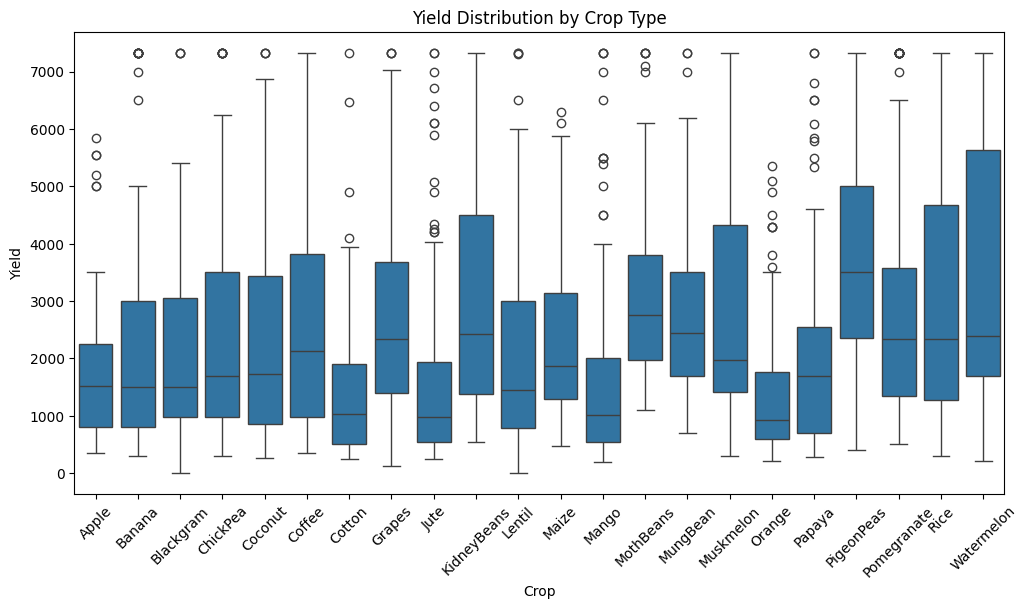

In [78]:
# Segmented analysis by crop type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Yield', data=df)
plt.xticks(rotation=45)
plt.title('Yield Distribution by Crop Type')
plt.show()

<hr style="border:1px solid black">

## Step 4: Reworking my dataset


### 4.1. Filter the Dataset for Rice

**Explanation:**
We will rework this dataset to ready it for model training and testing specifically for the crop type 'Rice'. First, filter the dataset only to include rows where the crop is 'Rice'.

In [79]:
# Filter the dataset for Rice
df_rice = df[df['Crop'] == 'Rice']

# Display the first few rows of the filtered dataset
df_rice.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,213.841241,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,213.841241,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,213.841241,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,213.841241,Rice,7325


### 4.2. Check for Linearity

**Explanation:**
To check for linearity between the predictors and the target variable (Yield), you can use scatter plots and correlation coefficients.

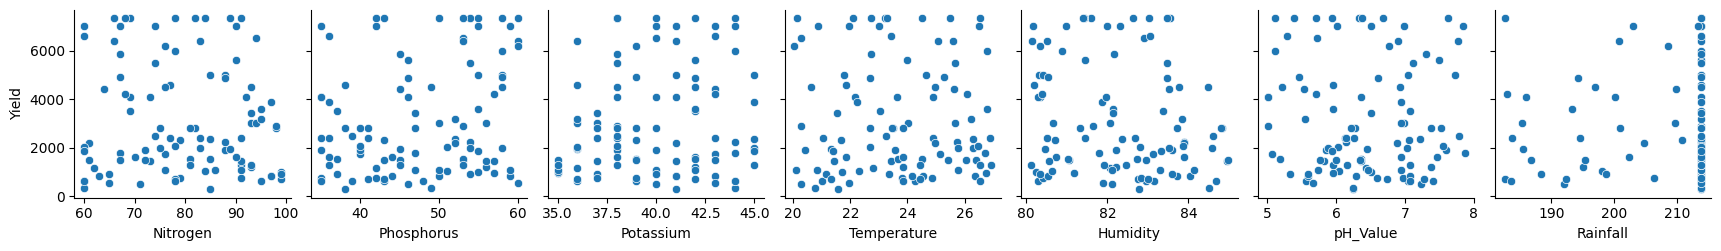

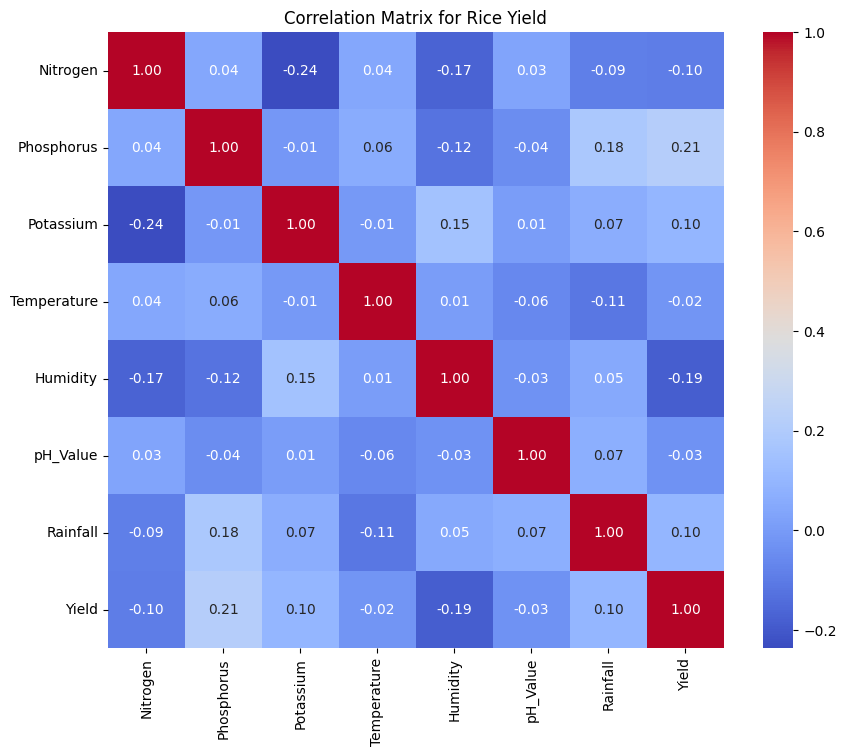

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of predictors
predictors = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

# Pairwise scatter plots
sns.pairplot(df_rice, x_vars=predictors, y_vars='Yield', kind='scatter', diag_kind='kde')
plt.show()

# Correlation matrix
corr_matrix = df_rice[predictors + ['Yield']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix for Rice Yield')
plt.show()

<hr style="border:1px solid black">

## Step 5: Preliminary EDA Findings and Recommendations

### 5.1. Findings for 'Rice'

1. The scatter plots above indicate no linearity between the predictor variables and the target variable 'Yield'.
2. This is confirmed by the correlation matrix shown above which shows low correlation coefficients hence low linearity.
3. The first two points indicate that the dataset lacks a strong linear relationship and hence linear models may be unsuited to this dataset.

### 5.2. Recommendations for 'Rice'

1. Owing to a lack of a strong linear relationship, non-linear models such as a Random Forest model may be the best way to go.
2. However, we can still model a Linear Regression model against a Random Forest model and compare their performance for the sake of model evaluation.


<hr style="border:1px solid black">

## Step 6: Building and Training the Models


### 6.1. Prepare the Dataset

**Explanation:**
Filter the dataset for Rice. Convert the yield values into categorical classes (low, medium, high).

In [81]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('Crop_Yield_Prediction.csv')

# Filter for Rice
rice_data = df[df['Crop'] == 'Rice'].copy()

# Create yield categories for classification
bins = [0, 3000, 6000, 9000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

# Use .loc to avoid SettingWithCopyWarning
rice_data.loc[:, 'YieldCategory'] = pd.cut(rice_data['Yield'], bins=bins, labels=labels)

# Split the data
X = rice_data.drop(columns=['Yield', 'YieldCategory', 'Crop'])
y = rice_data['YieldCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle imbalanced data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Feature Engineering
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_res)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

### 6.2. Random Forest

**Explanation:**
This step involves training a Random Forest model to predict the target variable, then evaluating the model performance.

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train Random Forest with best parameters
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Evaluate Random Forest
from sklearn.metrics import classification_report, accuracy_score

print("Random Forest Results:")
print(classification_report(y_test, rf_predictions))
print(f'Accuracy: {accuracy_score(y_test, rf_predictions)}')

C:\Users\Lenovo\.conda\envs\creating_an_environment\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\.conda\envs\creating_an_environment\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\.conda\envs\creating_an_environment\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\.conda\envs\creating_an_environment\Lib\site-packages\sklearn\base.py", line 6

Random Forest Results:
              precision    recall  f1-score   support

        High       0.82      0.90      0.86        10
         Low       0.90      0.75      0.82        12
      Medium       0.85      0.92      0.88        12
   Very High       1.00      1.00      1.00        16

    accuracy                           0.90        50
   macro avg       0.89      0.89      0.89        50
weighted avg       0.90      0.90      0.90        50

Accuracy: 0.9


### 6.2. Steps to Improve the Random Forest Model

**Explanation:**
Cross-Validation: Use cross-validation to ensure the model generalizes well to unseen data.

#### 6.2.1 Cross-Validation

In [88]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf_cv = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_cv, X_scaled, y_res, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.86       0.92       0.78       0.75510204 0.79591837]
Mean Cross-Validation Score: 0.8222040816326531
